This notebook uses the updated Johns Hopkins data structure. I'm focusing on US data.

There will be 8 dataframes

1) total cases            dfCU 

2) total deaths           dfDU

3) total cases by state   dfCU_state

4) total deaths by state  dfDU_state

5) new cases              dfCU_new

6) new deaths             dfDU_new

7) new cases by state     dfCU_state_new

8) new deaths by state    dfDU_state_new

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [70]:
#################
#Import data
#################
#Confirmed cases US
dfCU = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#Deaths US
dfDU = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
#Recovered (only global available)
dfR = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


#Confirmed cases global
dfCG = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#Deaths global
dfDG = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#Look up table for regions
dfLut = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')

In [71]:
#drop worthless columns
dfCU.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Country_Region'], axis=1, inplace=True)
dfDU.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Country_Region'], axis=1, inplace=True)
dfR.drop(['Lat', 'Long'], axis=1, inplace=True)

In [72]:
#creates new dfs grouped by state. All counties are summed to give 58 rows for states and , territories, and cruise ships 
dfCU_state = dfCU.groupby('Province_State').sum()
dfDU_state = dfCU.groupby('Province_State').sum()

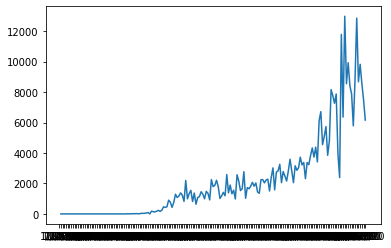

In [117]:
#add rows for new daily new cases
dfCU_state_new = dfCU_state.diff(axis=1)
plt.plot(dfCU_state_new.loc["California"])

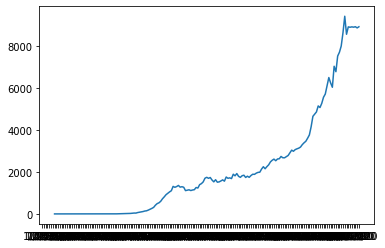

In [118]:
plt.plot(dfCU_state_new.loc['California'].rolling(window=7).mean())